In [ ]:
import pandas as pd
import numpy as np
!pip install mne
import mne

In [ ]:
path = "/content/OpenBCI-RAW-2024-02-29_20-49-54.txt"
df = pd.read_csv(path, delimiter = ',', skiprows=50, skipfooter=1000)
data = df.to_numpy()

<ipython-input-4-0d1409981b00>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path, delimiter = ',', skiprows=50, skipfooter=1000)


In [ ]:
sfreq = 250  # sample rate in Hz
# data = np.delete(data, [12, 13, 19, 20, 21, 23], axis=1) # IMPORTANT - CHANGE THIS FOR EVERY DATA READING
offset = 50 * 250
cutoff = data.shape[0]
data = data[:, :-1] # removes timestamps
ch_names = ['Channel {}'.format(i) for i in range(data.shape[1])]
ch_types = ['eeg' for i in range(data.shape[1])]

In [ ]:
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data.T, info)

Creating RawArray with float64 data, n_channels=24, n_times=107309
    Range : 0 ... 107308 =      0.000 ...   429.232 secs
Ready.


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Info | 7 non-empty values
 bads: []
 ch_names: Channel 1, Channel 2, Channel 3, Channel 4, Channel 5, Channel ...
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>
[[32828.69998559 32833.25974146 32832.65624436 ... 32216.79862938
  32204.75103912 32177.32544867]
 [-6047.01859319 -6039.41900008 -6040.15660765 ... -1935.63871809
  -1951.70962235 -1980.23044827]
 [20847.87438487 20846.64503892 20850.46718722 ... 21876.68047865
  21868.92442333 21841.11885323]
 ...
 [47873.45801275 47880.521164   47889.35010306 ... 47663.03869045
  47651.03580368 47632.08152438]
 [38406.8236836  38419.38536398 38429.71186992 ... 35901.12607493
  35890.88897596 35872.04645539]
 [46632.84678851 46641.22869268 46647.10720147 ... 45132.39653497
  45116.66090687 45097.12548222]]
NOTE: pick_types() is a legacy function. New code should use inst

<ipython-input-7-1c26e73fe0e3>:12: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
<ipython-input-7-1c26e73fe0e3>:12: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


Using matplotlib as 2D backend.


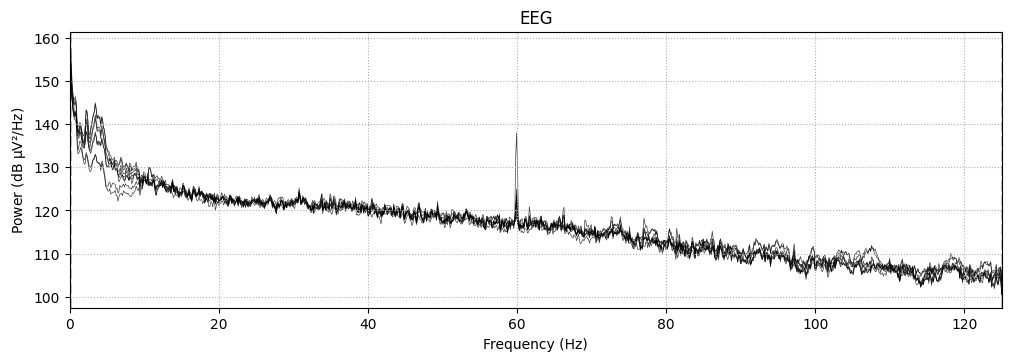

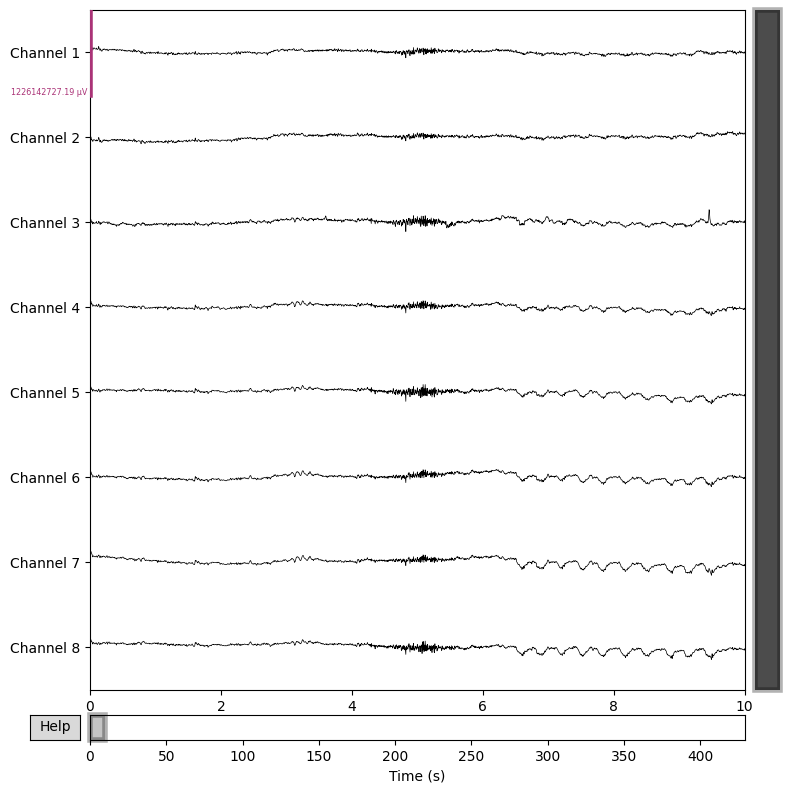

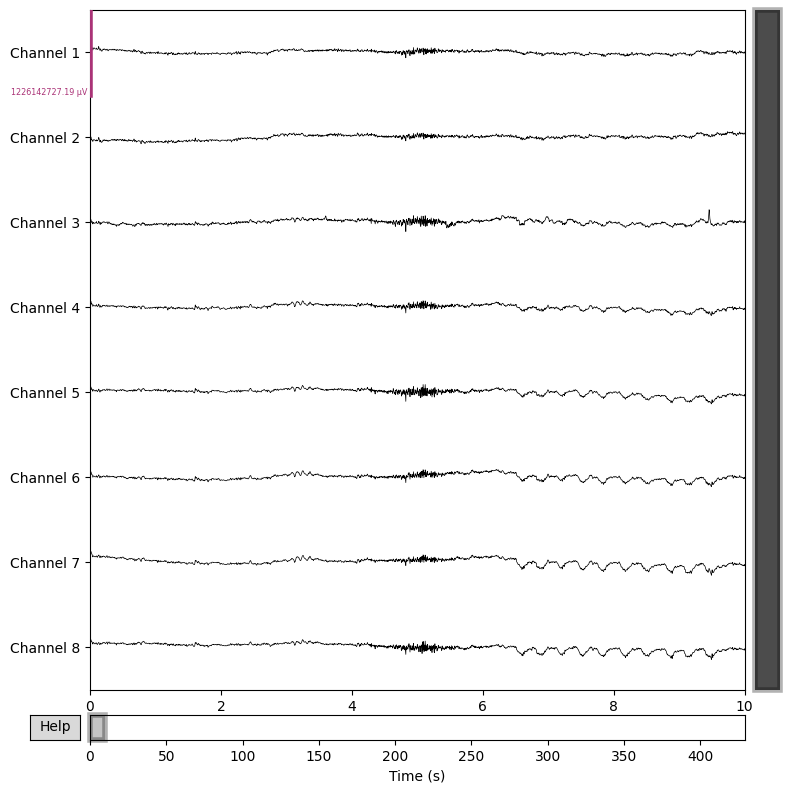

In [ ]:
ch_names = [raw.ch_names]
ch_names_to_keep = [ch_names[0][1:9]]
raw = raw.pick_channels(ch_names_to_keep[0])
# Now you can work with the MNE Raw object
print(raw.info)
print(raw.get_data())
# bad_channels = ['Channel 3']  # List of channel names to mark as bad
# raw.info['bads'] = bad_channels

# Remove bad channels from further analysis
raw.pick_types(eeg=True, exclude='bads')
raw.plot_psd()
raw.plot(scalings='auto')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 825 samples (3.300 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


<ipython-input-8-8c85665f2484>:9: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
<ipython-input-8-8c85665f2484>:9: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


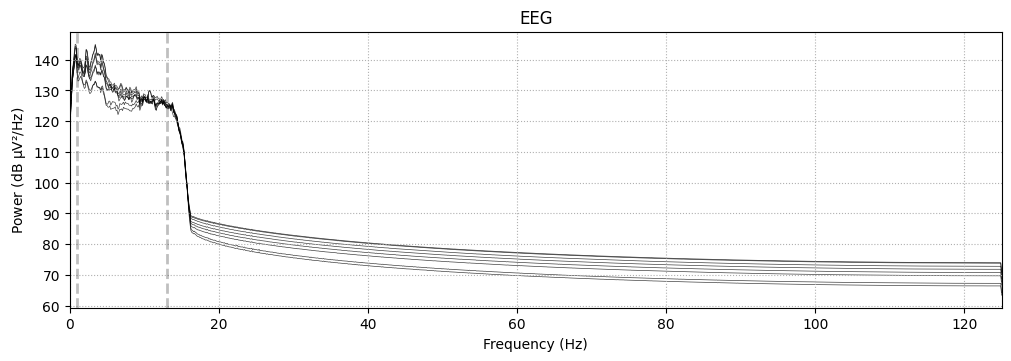

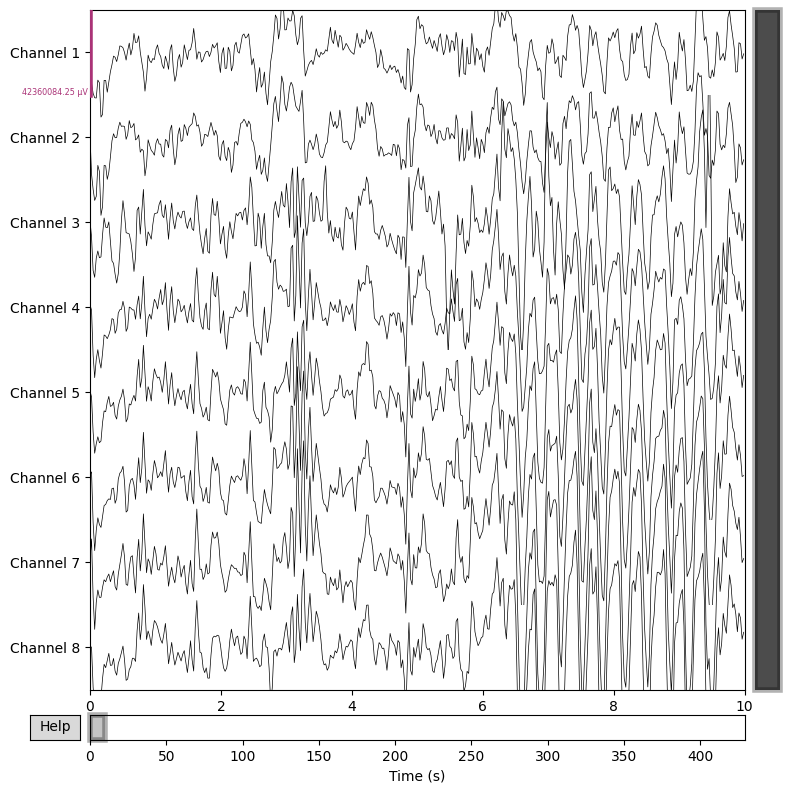

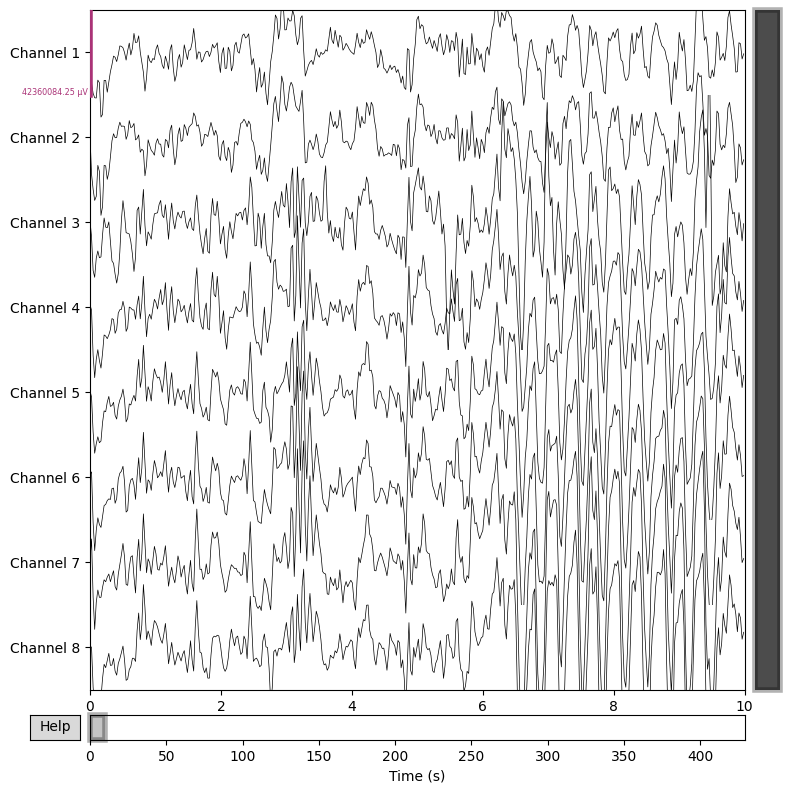

In [ ]:
# Time to start filtering
# 60hz electrical filter
#raw.notch_filter(60)


# Research said filter to alpha/beta waves
raw.filter(l_freq=1, h_freq=13)

raw.plot_psd()

#raw.crop(0, 10)
raw.plot(scalings='auto')

In [ ]:
filteredData = raw._data
num_samples = len(filteredData[0])
filteredData = np.append(filteredData, np.zeros([1, num_samples]), 0)

list_of_times = [[139, 198], [229, 258], [229, 258], [289, 319], [349, 378]]
for interval in list_of_times:
  interval[0] = interval[0] * sfreq - offset
  interval[1] = interval[1] * sfreq - offset

for interval in list_of_times:
  for i in range(interval[0], interval[1]):
    if i >= cutoff:
      break
    filteredData[8, i] = 1